In [14]:
import h5py
import os 
import sys

import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, "/home/lai/nplm/src")
from analysis_utils import load_binning

In [9]:
# Set random seed
SEED = 1231244
np.random.seed(SEED)

PALETTE_2 = [
    "#494B69", # 0
    "#695D7A", # 1
    "#9F5B72", # 2
    "#D8707C", # 3
    "#FDA85A", # 4
    "#FDCD5A", # 5
]


# Statistics                                                                                                                                                   
N_REF      = 1_000_000

# Systematics
SIGMA_S = 0.2
SIGMA_N = 0.2
SCALE   = np.array([-2, -1, -0.5, 0, 0.5, 1, 2]) * SIGMA_S
NORM    = np.array([-2, -1, -0.5, 0, 0.5, 1, 2]) * SIGMA_N

DATA_PATH = "./data/"
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

In [10]:
# poisson fluctuate the number of events in each sample
datasets = {
    "-2":   np.random.exponential(scale=1*np.exp(SCALE[0]), size=(N_REF, 1)),
    "-1":   np.random.exponential(scale=1*np.exp(SCALE[1]), size=(N_REF, 1)),
    "-0.5": np.random.exponential(scale=1*np.exp(SCALE[2]), size=(N_REF, 1)),
    "0":    np.random.exponential(scale=1*np.exp(SCALE[3]), size=(N_REF, 1)),
    "0.5":  np.random.exponential(scale=1*np.exp(SCALE[4]), size=(N_REF, 1)),
    "1":    np.random.exponential(scale=1*np.exp(SCALE[5]), size=(N_REF, 1)),
    "2":    np.random.exponential(scale=1*np.exp(SCALE[6]), size=(N_REF, 1)),
}

In [11]:
# save the datasets into separate files
# the name should follow: data_1dexpon_ref_nus_{scale}sigmas.h5 where the scale is encoded in the key of the dictionary
for key, val in datasets.items():
    with h5py.File(DATA_PATH + "data_1dexpon_ref_nus_{}sigmas.h5".format(key), "w") as f:
        f.create_dataset("data", data=val)

In [12]:
# Read the central value (scale=0)
with h5py.File(DATA_PATH + "data_1dexpon_ref_nus_{}sigmas.h5".format(0), "r") as f:
    data = f["data"][:]

In [13]:
bins = load_binning(path=DATA_PATH, name="binning_1dexpon.h5")

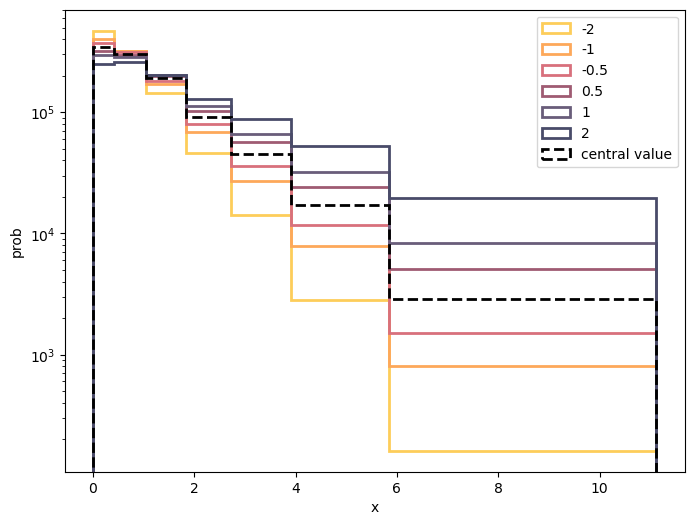

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
i=0
for key, value in datasets.items():
    if key=="0": continue
    ax.hist(value, bins=bins, histtype="step", label=key, density=False, lw=2, color=PALETTE_2[-i-1])
    i += 1
    
# plot the central value
ax.hist(data, bins=bins, histtype="step", label="central value", density=False, lw=2, ls="--", color="k")
    
ax.set_xlabel("x")
ax.set_ylabel("prob")
ax.legend()

ax.set_yscale("log")

plt.show()